In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timezone
from matplotlib import pyplot as plt

# set option to see all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)  # show all rows

####################################
#import data for injuries
#########################
from google.colab import drive
drive.mount('/content/drive')

filepath = '/content/drive/My Drive/NBA_DATA/Injury_data_V2.csv'

injury = pd.read_csv(filepath)

#######
# drop rows with no injured players
#####

injury = injury.dropna(subset=['Relinquished'])

injury = injury.drop(['Team','Acquired'],axis = 1) # drop team and Acquired

# display(injury)

######################
# import player stats
#################
filepath = '/content/drive/My Drive/NBA_DATA/NBA_all_2000.csv'

stats = pd.read_csv(filepath)
#display(stats)


#########
# change DATE to match on both
#########

#rename columns to epoch
injury.rename(columns={'Date': 'epoch'}, inplace=True)
stats.rename(columns={'DATE': 'epoch' }, inplace=True)

#convert strings to epochs:
format_string = "%Y-%m-%d"
injury_epochs = [datetime.strptime(date_string, format_string) for date_string in injury['epoch']]
injury['epoch'] = injury_epochs

format_string = "%Y-%m-%d %H:%M:%S"
stats_epochs = [datetime.strptime(date_string, format_string) for date_string in stats['epoch']]
stats['epoch'] = stats_epochs

##################################
# add biometric data
#######

# filepath = '/content/drive/My Drive/NBA_DATA/Players.csv'
filepath = '/content/drive/My Drive/NBA_DATA/all_seasons.csv'
anthro = pd.read_csv(filepath)
# display(injury)
# display(stats)
# display(anthro)

Mounted at /content/drive


,Unnamed: 0,epoch,Relinquished,Notes
0,0,1951-12-25,Don Barksdale,placed on IL
1,1,1952-12-26,Max Zaslofsky,placed on IL with torn side muscle
2,2,1956-12-29,Jim Baechtold,placed on inactive list
3,3,1959-01-16,Elgin Baylor,player refused to play after being denied a ro...
4,4,1961-11-26,Elgin Baylor,player reported for military duty
...,...,...,...,...
37624,37624,2023-04-09,Ja Morant,placed on IL with right hand injury
37625,37625,2023-04-09,Jaren Jackson Jr.,placed on IL with sore left elbow
37630,37630,2023-04-09,Davion Mitchell,placed on IL with sore left knee
37631,37631,2023-04-09,Trevor Keels,placed on IL with illness


1
12


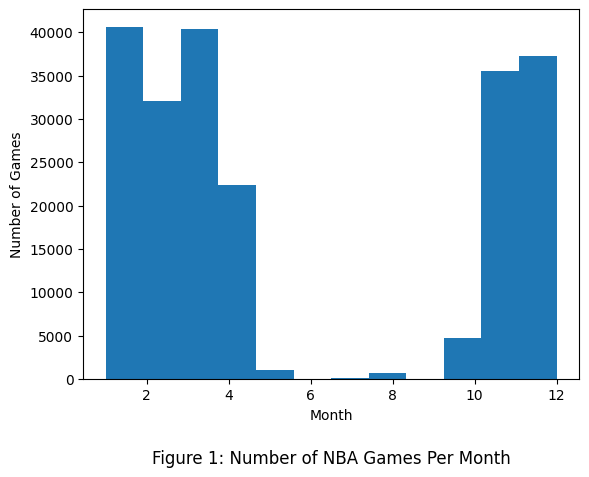

In [2]:
###
# get the dates for the season
month_of_game = np.array(stats['epoch'].dt.month)
print(np.min(month_of_game))
print(np.max(month_of_game))
plt.hist(month_of_game, bins=12)
plt.title('Figure 1: Number of NBA Games Per Month', y =-.25)
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.show()

In [3]:
## edit date to within 2000-20

stats = stats[(stats['epoch'] >= datetime(year=2000, month=10, day=1)) & (stats['epoch'] <= datetime(year=2020, month=5, day=1))] #'2010-01-01' & ---'2021-7-00')]
injury = injury[(injury['epoch'] >= datetime(year=2000, month=10, day=1)) & (injury['epoch'] <= datetime(year=2020, month=5, day=1))]



In [4]:
###########
# rename player column to match for all data frames
###############
injury.rename(columns={'Relinquished': 'player'}, inplace=True)
injury.rename(columns={'Notes': 'note'}, inplace=True)
stats.rename(columns={'Player': 'player' }, inplace=True)
anthro.rename(columns={'player_name': 'player' }, inplace=True)

#########
# remove spaces from beofre and after player name in injury
#########
injury['player'] = injury['player'].str.strip()

#######################
# drop unwanted columns from anthro df
#############

anthro = anthro.drop(['Unnamed: 0','team_abbreviation', 'age','college', 'country', 'draft_year', 'draft_round','draft_number', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct','dreb_pct','ts_pct', 'ast_pct', 'season'], axis =1)
injury = injury.drop(['Unnamed: 0'], axis = 1)

# display(injury)


/tmp/ipython-input-1033529273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury.rename(columns={'Relinquished': 'player'}, inplace=True)
/tmp/ipython-input-1033529273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury.rename(columns={'Notes': 'note'}, inplace=True)
/tmp/ipython-input-1033529273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury['player']

,epoch,player,note
4211,2000-10-30,Ademola Okulaja,placed on IR with strained back
4212,2000-10-30,Craig Claxton / Speedy Claxton,placed on IL with torn ACL in left knee (out f...
4213,2000-10-30,Matt Geiger,placed on IR with recovery from left knee surgery
4214,2000-10-30,Arvydas Sabonis,placed on IR with recovery from left knee surgery
4215,2000-10-30,Detlef Schrempf,placed on IR with pinched nerve in neck (playe...
...,...,...,...
30998,2020-03-10,Isaac Bonga,placed on IL with groin injury
31003,2020-03-11,Jimmy Butler,placed on IL with left big toe injury
31005,2020-03-11,Terry Rozier,placed on IL with illness
31006,2020-03-11,Dorian Finney-Smith,placed on IL with right hip injury


In [5]:
#print(anthro['player'].value_counts())

#########
# get rid of players not in stats from anthro
anthro = anthro[anthro['player'].isin(stats['player'])]

# aggregate duplicates
anthro_clean = anthro.groupby('player').agg({
    'player_weight': 'mean','player_height': 'mean', 'usg_pct': 'mean','gp': 'mean'}).reset_index()

print(anthro.columns)

### print results #####

#display(anthro_clean)
#print(anthro_clean['player'].value_counts())

Index(['player', 'player_height', 'player_weight', 'gp', 'usg_pct'], dtype='object')


In [6]:
####################
### add the heights and weights to all players in the stats df
###########
#display(stats)

stats = stats.merge(anthro_clean, on='player', how='left')

#display(stats)

## size is the same before and after

In [7]:
######
# print games by player
######
display(injury[injury['player'] == 'Jimmy Butler'])

,epoch,player,note
19828,2013-11-21,Jimmy Butler,placed on IL with turf toe
20763,2014-10-29,Jimmy Butler,placed on IL with sprained left thumb
21552,2015-01-27,Jimmy Butler,placed on IL with illness
21706,2015-02-12,Jimmy Butler,placed on IL with strained right shoulder
21809,2015-03-03,Jimmy Butler,placed on IL with sprained left elbow
...,...,...,...
29493,2019-04-01,Jimmy Butler,placed on IL with back injury
29529,2019-04-04,Jimmy Butler,placed on IL with back injury
29584,2019-04-10,Jimmy Butler,placed on IL with tightness in lower back
30759,2020-02-09,Jimmy Butler,placed on IL with strained right shoulder


In [8]:


#print(players_stats)
#print(players_injury)
#print(len(players_injury))

# common = players_injury.intersection(players_stats)
# print(len(common))
# print(stats.columns)



In [9]:
###########
# convert string to float for minutes played variable MP
#############
def mp_to_minutes(mp):
    m, s = mp.split(':')
    return int(m) + int(s) / 60

stats['MP'] = stats['MP'].apply(mp_to_minutes)

##########
# convert string age to int
def age_in_years(s):
    years, days = s.split('-')
    return int(years) + int(days)/365


#######
# apply the age function to the entire column of stats df
##########
stats['AGE'] = stats['AGE'].apply(age_in_years)




In [10]:
print(stats.columns)

Index(['epoch', 'AGE', 'TEAM', 'HOME/AWAY', 'OPPONENT', 'RESULT', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GAME_SCORE',
       '+/-', 'player', 'Years', 'Days', 'Season', 'rank_FG', 'quantile_FG',
       'rank_FGA', 'quantile_FGA', 'rank_3P', 'quantile_3P', 'rank_3PA',
       'quantile_3PA', 'rank_FT', 'quantile_FT', 'rank_FTA', 'quantile_FTA',
       'rank_ORB', 'quantile_ORB', 'rank_DRB', 'quantile_DRB', 'rank_TRB',
       'quantile_TRB', 'rank_AST', 'quantile_AST', 'rank_STL', 'quantile_STL',
       'rank_BLK', 'quantile_BLK', 'rank_PTS', 'quantile_PTS',
       'rank_GAME_SCORE', 'quantile_GAME_SCORE', 'player_weight',
       'player_height', 'usg_pct', 'gp'],
      dtype='object')


In [11]:
#############
## SET up creation of per season stat df
######

years_of_game = np.unique(stats['epoch'].dt.year)

years_of_game.sort()


inj_players = [x.strip() for x in injury['player']]
players_injury = set(inj_players)#np.unique(inj_players)
players_stats = set(stats['player'])#np.unique(stats['player'])


## number of players in both

# common = players_injury.intersection(players_stats)
# print(len(common))


##########
# function to assign injury severity
########
def assign_severity(note):
    if isinstance(note, str) and 'placed on IL' in note:
        return 1
    return 0



rows = []

for player in players_stats:

    injury_player = injury[injury['player'] == player]
    stats_player = stats[stats['player'] == player]   # one player at a time

    for year_it in years_of_game[:-1]:

        season_label = f"{year_it}_{player}"

        season_begin = datetime(year_it, 10, 1)
        season_end   = datetime(year_it+1, 5, 1)

        # player’s stats this season
        stats_season = stats_player[
            (stats_player['epoch'] >= season_begin) &
            (stats_player['epoch'] <= season_end)]

        # player’s injuries this season
        inj_season = injury_player[
            (injury_player['epoch'] >= season_begin) &
            (injury_player['epoch'] <= season_end)]

        ### why is inj_season empty???

        MP_av = stats_season['MP'].mean()
        point_av = stats_season['PTS'].mean()
        reb_av = stats_season['TRB'].mean()
        age = stats_season['AGE'].mean()
        FGA_av = stats_season['FGA'].mean()
        TOV_av = stats_season['TOV'].mean()
        Blk_av = stats_season['BLK'].mean()
        weight = stats_season['player_weight'].mean()
        height = stats_season['player_height'].mean()
        plus_minus = stats_season['+/-'].mean()
        BMI = weight/((height/100)**2)
        rb_per_min = reb_av/MP_av
        usg = stats_season['usg_pct'].mean()
        pt_per_min = point_av/MP_av
        gp = stats_season['gp'].mean()
        pf = stats_season['PF'].mean()

        if not inj_season.empty:
          severity = inj_season['note'].apply(assign_severity).max()  # sum of severities
        else:
          severity = 0  # no injuries this season

        rows.append([player, year_it, MP_av, point_av, reb_av,age, FGA_av, TOV_av, Blk_av, severity, weight, height, plus_minus, BMI, rb_per_min, usg, pt_per_min, gp, pf])


############
#final DataFrame
###########
stats_each_season = pd.DataFrame(rows, columns=['player', 'season', 'Minute Average', 'Point Average','Rebound Average', 'Age', 'FGA Average', 'Average TOV', 'Average Blocks', 'Injury Severity', 'Weight', 'Height','plus/minus', 'BMI', 'RB per min', 'Usg', 'pt_per_min', 'gp', 'pf'])

#display(stats_each_season)

print(stats_each_season['Injury Severity'].value_counts())

1077
Injury Severity
0    22034
1     4326
Name: count, dtype: int64


In [12]:
#final_df_cut = final_df.sample(frac=0.1)

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

#####
# make copy of combine df
#####
df_ml = stats_each_season

#####
#drop seasons with no play
#####

df_ml = df_ml.dropna()


print(df_ml['Injury Severity'].value_counts()) # get number injuries by severity with 0 as no injuries


#####
### input features and target feature
#####
feature_cols = ['Minute Average', 'Age', 'plus/minus', 'BMI', 'RB per min', 'Usg', 'pt_per_min', 'gp'] #'Weight', 'Height',

X = df_ml[feature_cols]
y = df_ml['Injury Severity']

print(y.value_counts())

#########
# scikitlearn spilt train and test data
############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#########
# make pipeline for random forest
############

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=200, max_samples=0.2, bootstrap=True, min_samples_split= 20, class_weight='balanced', max_depth=5))])  #####  class_weight='balanced' -- classes balanced can be added but I removed it

### inlcude a different model to show I tired

# pipe = Pipeline([
#     ("scale", StandardScaler()),
#     ("model", AdaBoostClassifier())   # or RandomForestClassifier()
# ])

# pipeline = Pipeline([
#     ("scaler", StandardScaler()),
#     ("rf", SVC(kernel='poly', C=1.0, gamma='scale', class_weight='balanced'))
# ])


#########
# fit model
############
pipeline.fit(X_train, y_train)

#ada boost
# pipe.fit(X_train, y_train)


#########
# perform cross validation
############
cv_scores = cross_val_score(pipeline, X, y, cv=10)

print("Cross-validation accuracy:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

### ada boost

# # cv_scores2 = cross_val_score(pipe, X, y, cv=10)

# print("Cross-validation accuracy:", cv_scores2)
# print("Mean CV accuracy for ADAboost:", cv_scores2.mean())

###############
# test model
###########

y_pred = pipeline.predict(X_test)

####ada
# y_pred_ada = pipe.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

#####
# feature importances
#####
rf_model = pipeline.named_steps["rf"]
importances = pd.Series(rf_model.feature_importances_, index=feature_cols)
print("\nFeature Importances:\n")
print(importances.sort_values(ascending=False))


Injury Severity
1    2911
0    2470
Name: count, dtype: int64
Injury Severity
1    2911
0    2470
Name: count, dtype: int64
Cross-validation accuracy: [0.55658627 0.54832714 0.51301115 0.51858736 0.55947955 0.53531599
 0.57806691 0.5204461  0.5260223  0.57992565]
Mean CV accuracy: 0.5435768427005814

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.70      0.58       494
           1       0.61      0.40      0.48       583

    accuracy                           0.54      1077
   macro avg       0.55      0.55      0.53      1077
weighted avg       0.56      0.54      0.53      1077


Confusion Matrix:

[[346 148]
 [350 233]]


AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [ ]:
# are some data points right for ypred and the model -- what does that tell me

# display(df_ml[df_ml['Point Average']==0].value_counts())
# display(stats[stats['player']=='Aaron McKie'])



In [ ]:
#########
# create histograms to view data
########
df_ml = stats_each_season
df_ml = df_ml.dropna(subset=['Minute Average'])


# plt.hist(df_ml['Injury Severity'], alpha= .5)
counts, bins, bars = plt.hist(
    df_ml['Injury Severity'],
    alpha=0.8,
    bins=[-0.5, 0.5, 1.5],
    rwidth=0.8
)
plt.bar_label(bars, label_type='edge', fmt='%d')
plt.xlabel('Injured vs Not Injured')
plt.xticks(ticks=[0, 1], labels=['No Injury', 'Injury'])
plt.ylabel("Frequency")

plt.title(f"Figure 4: Histogram of Seaons with Injuries and Seaons without Injuries", y = -.25)
plt.show()

# plt.hist(df_ml['gp'].dropna())
# plt.xlabel('Games Played In a Season')
# plt.ylabel("Frequency")
# plt.title(f"Figure 2: Histogram of Games Played", y = -.25)
# plt.show()

# plt.hist(df_ml['Age'].dropna())
# plt.xlabel('Age of Player During a Season')
# plt.ylabel("Frequency")
# plt.title(f"Figure 3: Histogram of Player Age", y = -.25)
# plt.show()

# df_ml = df_ml[df_ml['RB per min'] != 0]
# plt.scatter(df_ml["RB per min"], df_ml["pf"])
# plt.xlabel("Rebounds per Minute")
# plt.ylabel("Personal Fouls Commited")
# plt.title('Rebounds per Minute vs Personal Fouls Commited')
# plt.show()

##### double
injury_mask = df_ml['Usg'] > .25 ##### change this to filter by color
plt.scatter(
    df_ml.loc[~injury_mask, "RB per min"],
    df_ml.loc[~injury_mask, "plus/minus"],
    color='green', label='Usage less than 25%'
)

#### scatter plot with filter
plt.scatter(
    df_ml.loc[injury_mask, "RB per min"],
    df_ml.loc[injury_mask, "plus/minus"],
    color='blue', label='Usage great than 25%'
)

plt.xlabel("Rebounds per Minute")
plt.ylabel("Plus/Minus")
plt.title("Figure 5: Rebounds per Minute vs Plus/Minus", y = -.25)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay


roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
# add line
plt.plot([0, 1], [0, 1], label ='y=x')
plt.legend()

###############################
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
#'Minute Average', 'Age', 'plus/minus', 'BMI', 'RB per min', 'Usg', 'pt_per_min', 'gp'
PartialDependenceDisplay.from_estimator(pipeline, X, features=['Minute Average'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['Age'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['plus/minus'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['BMI'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['RB per min'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['Usg'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['pt_per_min'])
PartialDependenceDisplay.from_estimator(pipeline, X, features=['gp'])
